In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

<h1>Carbon Emissions Dataset</h1>

In [2]:
#load ghg dataset
carbon_df = pd.read_csv('PDGES-GHGRP-GHGEmissionsGES-2004-Present (1).csv', encoding='latin-1')
carbon_df.head()

,GHGRP ID / Numéro d'identification de PDGES,Reference Year / Année de référence,Facility Name / Nom de l'installation,Facility Location / Emplacement de l'installation,Facility City or District or Municipality / Ville ou District ou Municipalité de l'installation,Facility Province or Territory / Province ou territoire de l'installation,Facility Postal Code / Code postal de l'installation,Latitude,Longitude,Facility NPRI ID / Numéro d'identification de l'INRP,...,C4F8 (tonnes),C4F8 (tonnes CO2e / tonnes éq. CO2),C5F12 (tonnes),C5F12 (tonnes CO2e / tonnes éq. CO2),C6F14 (tonnes),C6F14 (tonnes CO2e / tonnes éq. CO2),PFC Total (tonnes CO2e / tonnes éq. CO2),SF6 (tonnes),SF6 (tonnes CO2e / tonnes éq. CO2),Total Emissions (tonnes CO2e) / Émissions totales (tonnes éq. CO2)
0,G10001,2020,Division Alma,1100 Melanion Street,Alma,Quebec,G8B 5W2,48.56500,-71.65556,983.0,...,0.0,0.0,0,0,0,0,0.0,NaN,NaN,7.779969e+04
1,G10003,2020,"Foothills Pipeline, Alberta",NaN,Airdrie,Alberta,T4A 2G7,NaN,NaN,NaN,...,0.0,0.0,0,0,0,0,0.0,NaN,NaN,2.878482e+05
2,G10004,2020,Kingston CoGen,5146 Taylor-Kidd Boulevard,Bath,Ontario,K0H 1G0,44.20950,-76.72460,5765.0,...,0.0,0.0,0,0,0,0,0.0,NaN,NaN,3.237168e+02
3,G10006,2020,Redwater Fertilizer Operations,56225 SH643,Sturgeon County,Alberta,T0A 2W0,53.84200,-113.09300,2134.0,...,0.0,0.0,0,0,0,0,0.0,NaN,NaN,1.091022e+06
4,G10007,2020,Alberta Envirofuels,9511 17 Street Northwest,Edmonton,Alberta,T6P 1Y3,53.53199,-113.36492,3974.0,...,0.0,0.0,0,0,0,0,0.0,NaN,NaN,3.016439e+05


In [3]:
#get summarized info
carbon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13093 entries, 0 to 13092
Data columns (total 77 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                           --------------  -----  
 0   GHGRP ID / Numéro d'identification de PDGES                                                                                      13093 non-null  object 
 1   Reference Year / Année de référence                                                                                              13093 non-null  int64  
 2   Facility Name / Nom de l'installation                                                                                            13093 non-null  object 
 3   Facility Location / Emplacement de l'installation                                               

In [4]:
#only take years from 2014 to 2019 (inclusive)
carbon_df = carbon_df[(carbon_df['Reference Year / Année de référence'] >= 2015) & (carbon_df['Reference Year / Année de référence'] <= 2019)]

In [5]:
#select relevant columns
carbon_df = carbon_df.iloc[:,[1,5,26]]
carbon_df.head()

,Reference Year / Année de référence,Facility Province or Territory / Province ou territoire de l'installation,CO2 (tonnes)
1703,2019,Quebec,7.143435e+04
1704,2019,Alberta,3.740449e+05
1705,2019,Ontario,9.745530e+02
1706,2019,Alberta,1.143131e+06
1707,2019,Alberta,2.648890e+05


In [6]:
#rename columns for ease
carbon_df = carbon_df.rename(columns={"Reference Year / Année de référence": "year",
                                     "Facility Province or Territory / Province ou territoire de l'installation": "province",
                                     "CO2 (tonnes)": "co2_tonnes"})
carbon_df.head()

,year,province,co2_tonnes
1703,2019,Quebec,7.143435e+04
1704,2019,Alberta,3.740449e+05
1705,2019,Ontario,9.745530e+02
1706,2019,Alberta,1.143131e+06
1707,2019,Alberta,2.648890e+05


In [7]:
#fill in which federal party ruled each province in different years
carbon_df["federal_party"] = ["a"]*len(carbon_df.year)

carbon_df.loc[carbon_df.province == "Alberta", "federal_party"] = "Conservative"

carbon_df.loc[carbon_df.province == "Ontario", "federal_party"] = "Liberal"

carbon_df.loc[(carbon_df.province == "Quebec") & (carbon_df.year >= 2015), "federal_party"] = "Liberal"
carbon_df.loc[(carbon_df.province == "Quebec") & (carbon_df.year == 2019), "federal_party"] = "Bloc"

carbon_df.loc[carbon_df.province == "British Columbia", "federal_party"] = "Liberal"

carbon_df.loc[(carbon_df.province == "New Brunswick") & (carbon_df.year >= 2015), "federal_party"] = "Liberal"
carbon_df.loc[(carbon_df.province == "New Brunswick") & (carbon_df.year == 2019), "federal_party"] = "Conservative"

carbon_df.loc[carbon_df.province == "Saskatchewan", "federal_party"] = "Conservative"

carbon_df.loc[carbon_df.province == "Manitoba", "federal_party"] = "Conservative"

carbon_df.loc[carbon_df.province == "Nova Scotia", "federal_party"] = "Liberal"

carbon_df.loc[carbon_df.province == "Newfoundland and Labrador", "federal_party"] = "Liberal"

carbon_df.loc[carbon_df.province == "Prince Edward Island", "federal_party"] = "Liberal"

carbon_df.loc[carbon_df.province == "Yukon", "federal_party"] = "Liberal"

carbon_df.loc[carbon_df.province == "Northwest Territories", "federal_party"] = "Liberal"

carbon_df.loc[carbon_df.province == "Nunavut", "federal_party"] = "NDP"

carbon_df.head()

,year,province,co2_tonnes,federal_party
1703,2019,Quebec,7.143435e+04,Bloc
1704,2019,Alberta,3.740449e+05,Conservative
1705,2019,Ontario,9.745530e+02,Liberal
1706,2019,Alberta,1.143131e+06,Conservative
1707,2019,Alberta,2.648890e+05,Conservative


In [8]:
#group emissions by year, province and party
grouped = carbon_df.groupby(['year', 'province', 'federal_party']).sum()
new_carbon_df = grouped.reset_index() #turn index into columns
new_carbon_df.head()

,year,province,federal_party,co2_tonnes
0,2015,Alberta,Conservative,1.360464e+08
1,2015,British Columbia,Liberal,1.191452e+07
2,2015,Manitoba,Conservative,1.490384e+06
3,2015,New Brunswick,Liberal,7.146915e+06
4,2015,Newfoundland and Labrador,Liberal,4.673263e+06


Text(0.5, 1.0, 'Yearly Provincial CO2 Emissions')

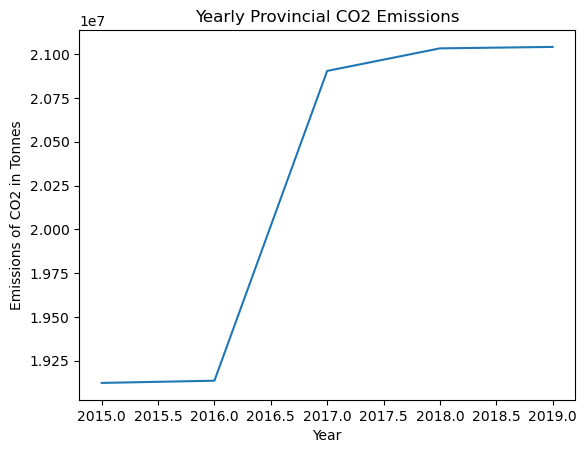

In [9]:
#plot emissions vs year
sns.lineplot(data=new_carbon_df, x='year', y='co2_tonnes', errorbar=None)
plt.ylabel("Emissions of CO2 in Tonnes")
plt.xlabel("Year")
plt.title('Yearly Provincial CO2 Emissions')

Looking at the plot above, we can see that CO2 emissions in Canada drastically increased from 2016 to 2017, but have otherwise remained stable.

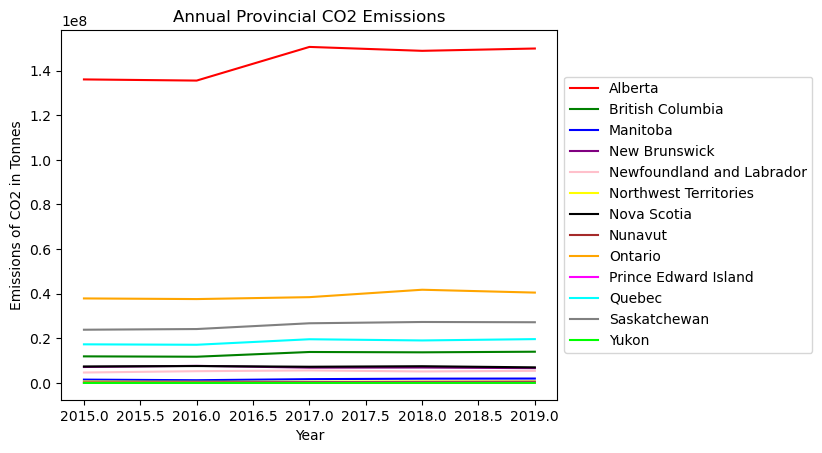

In [10]:
#define a distinctive color palette
province_palette = ('red', 'green', 'blue', 'purple', 'pink', 'yellow', 'black', 'brown', 'orange', 'magenta', 'cyan', 'grey', 'lime')

#plot provincial emissions vs year
sns.lineplot(data=new_carbon_df, x='year', y='co2_tonnes', hue='province', palette=province_palette)
plt.ylabel("Emissions of CO2 in Tonnes")
plt.xlabel("Year")
plt.title('Annual Provincial CO2 Emissions')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))

From the above plot, we can see that from 2015 to 2019, Alberta has consistently been the largest producer of CO2 emissions. This makes sense, as Alberta's economy is primarily driven by oil exports. After that, the order seems to be Ontario, Saskatchewan, Quebec and B.C. as the top 5. Alberta produces significantly more CO2 than Ontario in second place; about a metric tonne more every year.

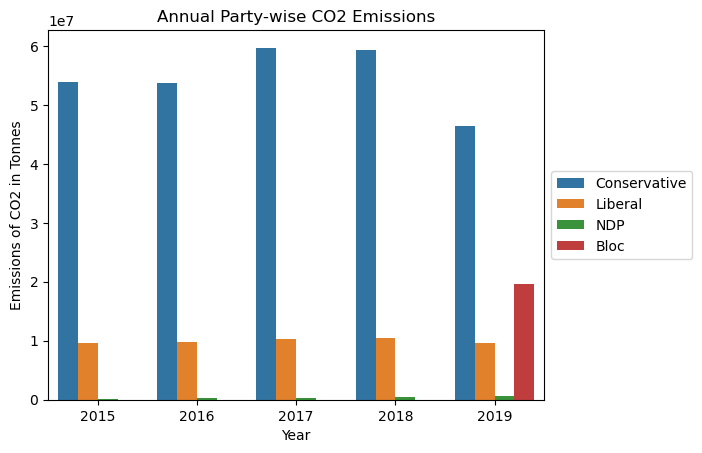

In [11]:
#plot party-qise emissions vs year
sns.barplot(data=new_carbon_df, x='year', y='co2_tonnes', hue='federal_party', errorbar=None)
plt.ylabel("Emissions of CO2 in Tonnes")
plt.xlabel("Year")
plt.title('Annual Party-wise CO2 Emissions')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))

From the above plot, we can see that for all 5 years, Conservative provinces consistently produced more CO2 emissions than other parties. This is likely due to Alberta and Saskatchewan both being Conservative provinces, while also both being in the top 5 CO2-producing provinces.

<h1>Parliament Dataset</h1>

In [12]:
df = pd.read_csv('comb_parl.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152522 entries, 0 to 152521
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       152522 non-null  int64  
 1   basepk           152522 non-null  int64  
 2   hid              152522 non-null  object 
 3   speechdate       152522 non-null  object 
 4   pid              138480 non-null  object 
 5   opid             138268 non-null  float64
 6   speakeroldname   138261 non-null  object 
 7   speakerposition  18968 non-null   object 
 8   maintopic        151339 non-null  object 
 9   subtopic         151556 non-null  object 
 10  subsubtopic      41939 non-null   object 
 11  speechtext       152522 non-null  object 
 12  speakerparty     138268 non-null  object 
 13  speakerriding    138268 non-null  object 
 14  speakername      147545 non-null  object 
 15  speakerurl       132642 non-null  object 
dtypes: float64(1), int64(2), object(13)
me

In [14]:
#get rows talking about carbon tax
df_carbon = df.loc[df.speechtext.str.lower().str.contains('carbon tax'),:]
df_carbon.shape

(2611, 16)

We have ~2000 observations to work with, which is pretty good.

In [15]:
#look for rows that talk about harming Canadians
filter_ = df_carbon.speechtext.str.extract(r'((tax)(.)*(harm|cost|jeopardize|hurt|pay)(.)*Canadian)').dropna()
filter_.shape

(510, 5)

We know from the earlier regex filtering that all of our observations contain the term 'carbon tax'. If we search for sections with 'tax harm Canadian' (including synonyms for harm) then we will be able to find observations that more likely than not talk about the carbon tax hurting Canadians in some way. Above, we see that there are 510 such observations compared to the total 2611. This has essentially split our dataset into a 80:20 ratio of for to against the carbon tax. While that's not too bad, a 50:50 split would have been ideal, since we would know the data is in no way skewed. However, that can be easily fixed by sampling from the 'for' set. Altogether, we'll have ~1000 observations, which is reasonable for modelling purposes.

In [16]:
#split the sets
df_against_tax = df_carbon.loc[df_carbon.index.isin(filter_.index), :]
df_for_tax = df_carbon.loc[~df_carbon.index.isin(filter_.index), :]

#add a 'sentiment' column; this will help us identify whether the text is speaking for or against the carbon tax
df_against_tax.loc[:, 'Sentiment'] = 'Negative'
df_for_tax.loc[:, 'Sentiment'] = 'Positive'

C:\Users\ehraa\AppData\Local\Temp\ipykernel_9544\1055247102.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_against_tax.loc[:, 'Sentiment'] = 'Negative'
C:\Users\ehraa\AppData\Local\Temp\ipykernel_9544\1055247102.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_tax.loc[:, 'Sentiment'] = 'Positive'


In [17]:
#sample from 'for' set
df_for_tax = df_for_tax.sample(filter_.shape[0], random_state=0)

#combine the 2 sets
df = pd.concat([df_against_tax, df_for_tax], axis=0)
df.shape

(1020, 17)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1020 entries, 2738 to 107560
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1020 non-null   int64  
 1   basepk           1020 non-null   int64  
 2   hid              1020 non-null   object 
 3   speechdate       1020 non-null   object 
 4   pid              1017 non-null   object 
 5   opid             1016 non-null   float64
 6   speakeroldname   1016 non-null   object 
 7   speakerposition  9 non-null      object 
 8   maintopic        1015 non-null   object 
 9   subtopic         1015 non-null   object 
 10  subsubtopic      306 non-null    object 
 11  speechtext       1020 non-null   object 
 12  speakerparty     1016 non-null   object 
 13  speakerriding    1016 non-null   object 
 14  speakername      1020 non-null   object 
 15  speakerurl       1006 non-null   object 
 16  Sentiment        1020 non-null   object 
dtypes: float64(1),

In [19]:
#only keep useful columns
df = df.iloc[:, [3,12,13,16]]
df.head()

,speechdate,speakerparty,speakerriding,Sentiment
2738,2015-12-08,Conservative,Dauphin--Swan River--Neepawa,Negative
4878,2015-02-20,Conservative,Oak Ridges--Markham,Negative
5056,2015-02-23,Conservative,Moncton--Riverview--Dieppe,Negative
5667,2015-02-25,Conservative,Burlington,Negative
5669,2015-02-25,Conservative,Calgary Centre,Negative


In [20]:
df.isna().sum()

speechdate       0
speakerparty     4
speakerriding    4
Sentiment        0
dtype: int64

In [21]:
#drop remaining NAs
df.dropna(inplace=True)

Further, let's split up the dates into different columns for future ease.

In [22]:
dates_split = df.speechdate.str.extract(r'((\d\d\d\d)-(\d\d)-(\d\d))')
df['Year'] = dates_split.iloc[:, 1]

df.head()

,speechdate,speakerparty,speakerriding,Sentiment,Year
2738,2015-12-08,Conservative,Dauphin--Swan River--Neepawa,Negative,2015
4878,2015-02-20,Conservative,Oak Ridges--Markham,Negative,2015
5056,2015-02-23,Conservative,Moncton--Riverview--Dieppe,Negative,2015
5667,2015-02-25,Conservative,Burlington,Negative,2015
5669,2015-02-25,Conservative,Calgary Centre,Negative,2015


In [23]:
#drop speechdate column as we don't need it anymore
df.drop('speechdate', axis=1, inplace=True)

In [24]:
#make sure there are no erroneus entries
print(df.speakerparty.unique())
print(df.Year.unique())
len(df.speakerriding.unique())

['Conservative' 'New Democratic Party' 'Liberal' 'Independent'
 'Bloc Québécois' 'Green Party' 'NDP']
['2015' '2016' '2017' '2018' '2019']


161

In [25]:
#fix NDP and Bloc splits
df.loc[df.speakerparty=='New Democratic Party', 'speakerparty'] = 'NDP'
df.loc[df.speakerparty=='Bloc Québécois', 'speakerparty'] = 'Bloc'

#turn year into integer variables
df.Year = df.Year.apply(lambda x: int(x))

Now, time to visualize.

Text(0, 0.5, 'Count')

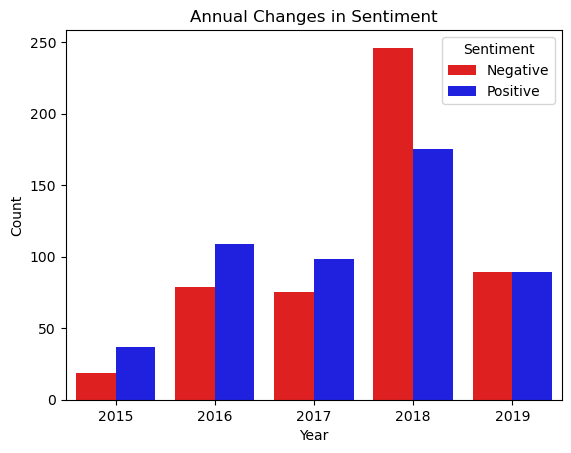

In [26]:
#plot sentiments vs years
sns.countplot(data=df, x='Year', hue='Sentiment', palette=['red', 'blue'])
plt.title("Annual Changes in Sentiment")
plt.xlabel("Year")
plt.ylabel("Count")

Looks like in 2015, 2016 and 2017, there was a more positive sentiment, while in 2018 there was a more negative sentiment about carbon tax. In 2019, it seems to be about equal. Unfortunately, since there are a different number of observations for each year, we can't directly compare annual changes in sentiment.

<Axes: xlabel='speakerparty', ylabel='count'>

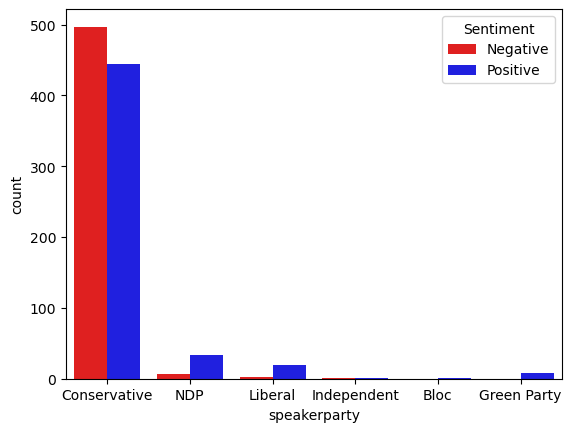

In [27]:
#plot sentimant and party
sns.countplot(data=df, x='speakerparty', hue='Sentiment', palette=['red', 'blue'])

Conservatives seems to have been speaking largely against the tax, while the NDP, Liberal and Green Party members seem to be speaking mostly for. The data shows that Conservatives also seem to be talking about the carbon tax a lot more, although that could simply be due to the sampling.

<h1>Joining Datasets</h1>

Now, let's join the 2 dataseta to see what insights we can get.

In [28]:
#before we join the datasets, we need to first get the province of each riding, so that we can look at provincial sentiment as well
ridings = gpd.read_file('2015_ridings/FED_CA_2_2_ENG.shp')
ridings.head()

,FED_NUM,NID,FEDNUM,ENNAME,FRNAME,PROVCODE,CREADT,REVDT,REPORDER,DECPOPCNT,QUIPOPCNT,ENLEGALDSC,FRLEGALDSC,geometry
0,35029,{30F68311-B8D1-4049-9DA1-88F80222930F},35029,Etobicoke North,Etobicoke-Nord,ON,20131005,None,2013,117601,0,http://www.elections.ca/res/cir/maps2/mapprov....,http://www.elections.ca/res/cir/maps2/mapprov....,"POLYGON ((7201954.777 935407.037, 7202067.746 ..."
1,35032,{39AFA153-47AC-4203-87DE-B7A71DF234E9},35032,Guelph,Guelph,ON,20131005,None,2013,121688,0,http://www.elections.ca/res/cir/maps2/mapprov....,http://www.elections.ca/res/cir/maps2/mapprov....,"POLYGON ((7151948.911 899971.331, 7151447.129 ..."
2,48017,{C3BC533E-6642-4C06-9291-10C0907A24A6},48017,Edmonton Mill Woods,Edmonton Mill Woods,AB,20131005,None,2013,106103,0,http://www.elections.ca/res/cir/maps2/mapprov....,http://www.elections.ca/res/cir/maps2/mapprov....,"POLYGON ((4811379.686 2157147.634, 4811380.094..."
3,48018,{C5BCB32E-57F6-4448-A533-33D114D02386},48018,Edmonton Riverbend,Edmonton Riverbend,AB,20131005,None,2013,106302,0,http://www.elections.ca/res/cir/maps2/mapprov....,http://www.elections.ca/res/cir/maps2/mapprov....,"POLYGON ((4801564.891 2159173.746, 4801137.980..."
4,48021,{BBFBC678-2943-48FD-BC75-A259C0060A06},48021,Edmonton--Wetaskiwin,Edmonton--Wetaskiwin,AB,20131005,None,2013,110644,0,http://www.elections.ca/res/cir/maps2/mapprov....,http://www.elections.ca/res/cir/maps2/mapprov....,"POLYGON ((4694436.409 2130675.640, 4694437.989..."


In [29]:
#normalize the riding names in both datasets
def normalize(x):
    x = x.lower()
    new_x = ""
    for c in x:
        if ord(c) >= 97 and ord(c) <= 122:
            new_x += c
    return new_x

ridings.ENNAME = ridings.ENNAME.apply(normalize)
df.speakerriding = df.speakerriding.apply(normalize)

In [53]:
ridings_unique = ridings.ENNAME.unique()
df_unique = df.speakerriding.unique()
joined = np.concatenate((ridings_unique, df_unique))

diff = list(set([k if k not in ridings_unique else None for k in df_unique]))
len(diff) - 1

0

There are 16 ridings that aren't in both datasets; this could be the result of when different ridings elected MPs (this has changed over time). If we drop these 16 values, we'll still have 1000 observations to work with, so it shouldn't be too bad.

In [31]:
ridings.PROVCODE.unique()

array(['ON', 'AB', 'QC', 'YT', 'NU', 'NT', 'SK', 'BC', 'MB', 'PE', 'NL',
       'NS', 'NB'], dtype=object)

In [32]:
#convert province codes in ridings dataset to province names
def edit(x):
    key = {'ON': 'Ontario', 'AB': 'Alberta', 'QC': 'Quebec', 'YT': 'Yukon', 'NU': 'Nunavut', 'NT': 'Northwest Territories',
           'SK': 'Saskatchewan', 'BC': 'British Columbia', 'MB': 'Manitoba', 'PE': 'Prince Edward Island',
           'NL': 'Newfoundland and Labrador', 'NS': 'Nova Scotia', 'NB': 'New Brunswick'}
    return key[x]
    
ridings.PROVCODE = ridings.PROVCODE.apply(edit)
ridings.PROVCODE.unique()

array(['Ontario', 'Alberta', 'Quebec', 'Yukon', 'Nunavut',
       'Northwest Territories', 'Saskatchewan', 'British Columbia',
       'Manitoba', 'Prince Edward Island', 'Newfoundland and Labrador',
       'Nova Scotia', 'New Brunswick'], dtype=object)

In [49]:
df = df.loc[df.speakerriding.isin(ridings.ENNAME)]

(991, 4)

In [55]:
#now we merge
df_prov = df.merge(ridings, left_on='speakerriding', right_on='ENNAME', how='outer')
df_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226 entries, 0 to 1225
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   speakerparty   1016 non-null   object  
 1   speakerriding  1016 non-null   object  
 2   Sentiment      1016 non-null   object  
 3   Year           1016 non-null   float64 
 4   FED_NUM        1226 non-null   int64   
 5   NID            1226 non-null   object  
 6   FEDNUM         1226 non-null   int64   
 7   ENNAME         1226 non-null   object  
 8   FRNAME         1226 non-null   object  
 9   PROVCODE       1226 non-null   object  
 10  CREADT         1226 non-null   object  
 11  REVDT          193 non-null    object  
 12  REPORDER       1226 non-null   object  
 13  DECPOPCNT      1226 non-null   int64   
 14  QUIPOPCNT      1226 non-null   int64   
 15  ENLEGALDSC     1226 non-null   object  
 16  FRLEGALDSC     1226 non-null   object  
 17  geometry       1226 non-null   ge

In [56]:
df_prov = df_prov.iloc[:, [0,2,3,9]]
df_prov.isna().sum()

speakerparty    210
Sentiment       210
Year            210
PROVCODE          0
dtype: int64

In [57]:
df_prov.dropna(inplace=True)
df_prov.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1016 entries, 0 to 1015
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   speakerparty  1016 non-null   object 
 1   Sentiment     1016 non-null   object 
 2   Year          1016 non-null   float64
 3   PROVCODE      1016 non-null   object 
dtypes: float64(1), object(3)
memory usage: 39.7+ KB


Now, let's join the sentiment dataset with the emissions dataset from before.

In [98]:
#going to check if either dataset has less or more values for 'key' columns (primary & foreign keys)
a = df_prov.speakerparty.unique()
b = new_carbon_df.federal_party.unique()

len(a) - len(b)

2

In [99]:
a = df_prov.Year.unique()
b = new_carbon_df.year.unique()

len(a) - len(b)

0

In [100]:
a = df_prov.PROVCODE.unique()
b = new_carbon_df.province.unique()

len(a) - len(b)

-3

According to the above results, df_prov has more parties, and new_carbon_df has more provinces. To avoid nulls when joining, I'm going to filter the datasets beforehand.

In [121]:
# new_carbon_df = new_carbon_df.loc[new_carbon_df.province.isin(df_prov.PROVCODE.unique()), :]
# df_prov = df_prov.loc[df_prov.speakerparty.isin(new_carbon_df.federal_party.unique()), :]
df_joined = df_prov.merge(new_carbon_df, left_on=['Year', 'PROVCODE', 'speakerparty'], right_on=['year', 'province', 'federal_party'], how='right')

In [122]:
df_joined.isna().sum()

speakerparty     26
Sentiment        26
Year             26
PROVCODE         26
year              0
province          0
federal_party     0
co2_tonnes        0
dtype: int64

In [123]:
df_joined.dropna(inplace=True)
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 431 entries, 0 to 456
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   speakerparty   431 non-null    object 
 1   Sentiment      431 non-null    object 
 2   Year           431 non-null    float64
 3   PROVCODE       431 non-null    object 
 4   year           431 non-null    int64  
 5   province       431 non-null    object 
 6   federal_party  431 non-null    object 
 7   co2_tonnes     431 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 30.3+ KB
